<a href="https://colab.research.google.com/github/pavantirunagari/machinelearning-project/blob/models/cardatamachinelearningmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of a Car showroom**

## 1.1 Importing the required libraries

In [87]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2 reading the data and underatanding the data

In [88]:
# reading data into the pandas as car_data
car_data=pd.read_csv("/content/data.csv")
#reading the shape and checking the statistical summary
car_data.describe(),car_data.shape

(               Year    Engine HP  ...    Popularity          MSRP
 count  11914.000000  11845.00000  ...  11914.000000  1.191400e+04
 mean    2010.384338    249.38607  ...   1554.911197  4.059474e+04
 std        7.579740    109.19187  ...   1441.855347  6.010910e+04
 min     1990.000000     55.00000  ...      2.000000  2.000000e+03
 25%     2007.000000    170.00000  ...    549.000000  2.100000e+04
 50%     2015.000000    227.00000  ...   1385.000000  2.999500e+04
 75%     2016.000000    300.00000  ...   2009.000000  4.223125e+04
 max     2017.000000   1001.00000  ...   5657.000000  2.065902e+06
 
 [8 rows x 8 columns], (11914, 16))

## 2.Getting the basic information of data 

**Here we will see the what is the datatype of each row and no of non null values.Also we can know the names of each coloumn**

In [89]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**By observing the non null values we can see that the column Market Catogery has the more number of null values.So it is better to drop out this column.And by observing the columns we can know that the number of rows and engine fuel type also didn't show impact on the model.So we can drop those as well**

In [90]:
car_data=car_data.drop(columns=["Market Category","Number of Doors","Engine Fuel Type"])
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   highway MPG        11914 non-null  int64  
 10  city mpg           11914 non-null  int64  
 11  Popularity         11914 non-null  int64  
 12  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


## 3.Renaming the columns

In [91]:
car_data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'},inplace=True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Popularity     11914 non-null  int64  
 12  Price          11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


## 4.1 Checking for any duplicate values

In [92]:
car_data_duplicate=car_data[car_data.duplicated()]
car_data_duplicate,car_data_duplicate.shape

(         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
 14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
 18       Audi       100  1992  172.0  ...     24    17       3105   2000
 20       Audi       100  1992  172.0  ...     24    17       3105   2000
 24       Audi       100  1993  172.0  ...     24    17       3105   2000
 25       Audi       100  1993  172.0  ...     24    17       3105   2000
 ...       ...       ...   ...    ...  ...    ...   ...        ...    ...
 11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
 11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
 11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
 11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
 11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499
 
 [792 rows x 13 columns], (792, 13))

## 4.2 Removing the duplicates

In [93]:
car_data.drop_duplicates(inplace=True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11122 non-null  object 
 1   Model          11122 non-null  object 
 2   Year           11122 non-null  int64  
 3   HP             11053 non-null  float64
 4   Cylinders      11092 non-null  float64
 5   Transmission   11122 non-null  object 
 6   Drive Mode     11122 non-null  object 
 7   Vehicle Size   11122 non-null  object 
 8   Vehicle Style  11122 non-null  object 
 9   MPG-H          11122 non-null  int64  
 10  MPG-C          11122 non-null  int64  
 11  Popularity     11122 non-null  int64  
 12  Price          11122 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


## 4.3 Filling the nan values

**As we can see from the above info there are some nan values in the data.For constructing a machine learning model there should not be any nan value present in the data.We can remove the nan values.But instead of removing if we replace the nan valuesit gives more data for the machine model to give more accuracy**

In [94]:
car_data.fillna(method='ffill',inplace=True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11122 non-null  object 
 1   Model          11122 non-null  object 
 2   Year           11122 non-null  int64  
 3   HP             11122 non-null  float64
 4   Cylinders      11122 non-null  float64
 5   Transmission   11122 non-null  object 
 6   Drive Mode     11122 non-null  object 
 7   Vehicle Size   11122 non-null  object 
 8   Vehicle Style  11122 non-null  object 
 9   MPG-H          11122 non-null  int64  
 10  MPG-C          11122 non-null  int64  
 11  Popularity     11122 non-null  int64  
 12  Price          11122 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


## 5.Box plotting to check outliers and removing outliers

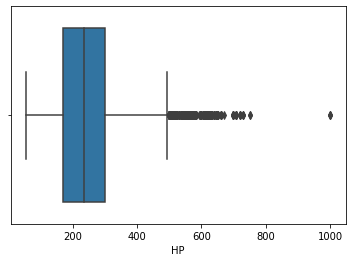

In [95]:
sns.boxplot(car_data['HP'])


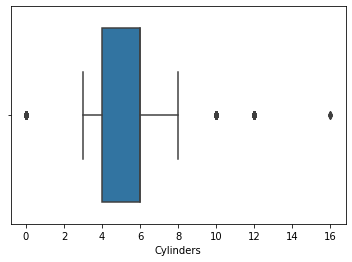

In [96]:
sns.boxplot(car_data['Cylinders'])

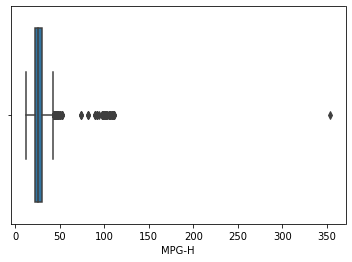

In [97]:
sns.boxplot(car_data['MPG-H'])

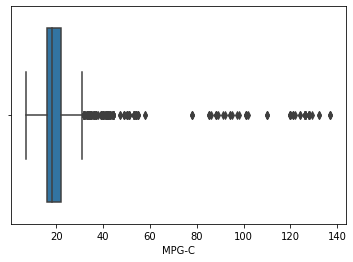

In [98]:
sns.boxplot(car_data['MPG-C'])

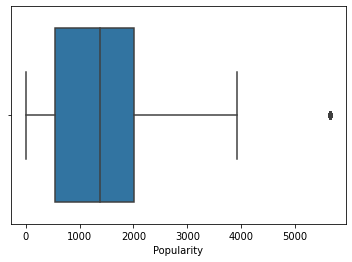

In [99]:
sns.boxplot(car_data['Popularity'])

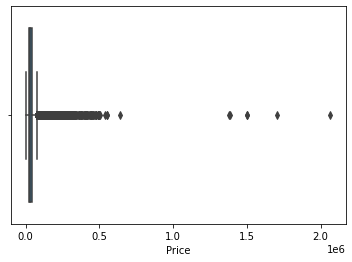

In [100]:
sns.boxplot(car_data['Price'])

In [101]:
Q1=car_data.quantile(0.25)
Q2=car_data.quantile(0.75)
IQR=Q2-Q1
car_data=car_data[~((car_data<(Q1-1.5*IQR))|(car_data>(Q2+1.5*IQR))).any(axis=1)]
car_data.shape

(8576, 13)

## 6.Most represented car brands

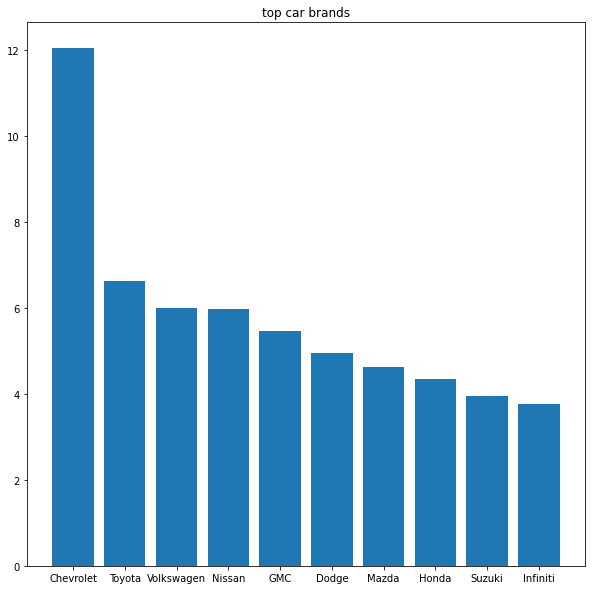

In [102]:
brand_count=car_data['Make'].value_counts()*100/sum(car_data['Make'].value_counts())
popular_brands=brand_count.index[:10]
plt.figure(figsize=(10,10))
plt.bar(popular_brands,brand_count[0:10])
plt.title('top car brands')
plt.show()

In [103]:
avg_prices=car_data[['Make','Price']].loc[(car_data['Make']=='Chevrolet')|
                                          (car_data['Make']=='Toyota')|
                                          (car_data['Make']=='Volkswagen')|
                                          (car_data['Make']=='Nissan')|
                                          (car_data['Make']=='GMC')|
                                          (car_data['Make']=='Dodge')|
                                          (car_data['Make']=='Mazda')|
                                          (car_data['Make']=='Honda')|
                                          (car_data['Make']=='Suzuki')|
                                          (car_data['Make']=='Infiniti')].groupby('Make').mean()
avg_prices

,Price
Make,
Chevrolet,28207.045499
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20830.670025
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


## 7.correlation matrix

**plotting the correlation matrix**

In [104]:
car_data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325029,-0.106530,0.373126,0.335017,0.200499,0.592008
HP,0.325029,1.000000,0.733501,-0.452827,-0.554034,0.094568,0.745424
Cylinders,-0.106530,0.733501,1.000000,-0.691566,-0.746529,0.012499,0.388570
MPG-H,0.373126,-0.452827,-0.691566,1.000000,0.937005,0.094043,-0.120851
MPG-C,0.335017,-0.554034,-0.746529,0.937005,1.000000,0.082408,-0.196935
Popularity,0.200499,0.094568,0.012499,0.094043,0.082408,1.000000,0.112513
Price,0.592008,0.745424,0.388570,-0.120851,-0.196935,0.112513,1.000000


**plotting the heat map**

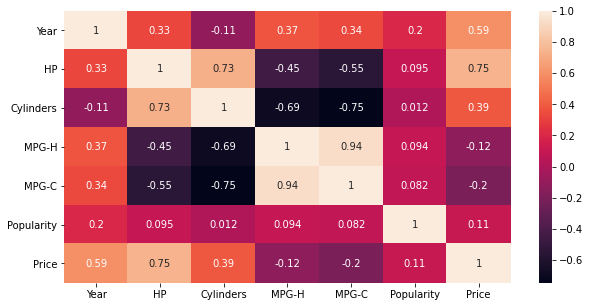

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(car_data.corr(),annot=True)

**From the above heat map we can say that the price hily dependent on the HP, Cylinders and the manufactured year.**

i.e if the HP and NO of Cylinders are high then the price of the car is also high.

**similarly HP and cylinders are also highly correlated.**

i.e if the no of cylinders are increased the HP is also increased.

### **anti correlation**

Here the Cylinders and MPG-C have high anti correlation

## 8.Plotting different graphs

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(car_data['Price'],car_data['HP'])

Error in callback <function flush_figures at 0x7f5bf5c35840> (for post_execute):


KeyboardInterrupt: ignored

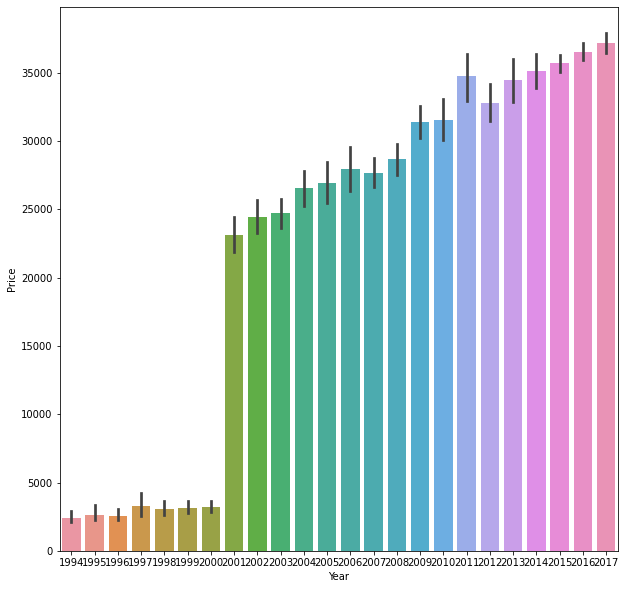

In [107]:
plt.figure(figsize=(10,10))
sns.barplot(car_data['Year'],car_data['Price'])

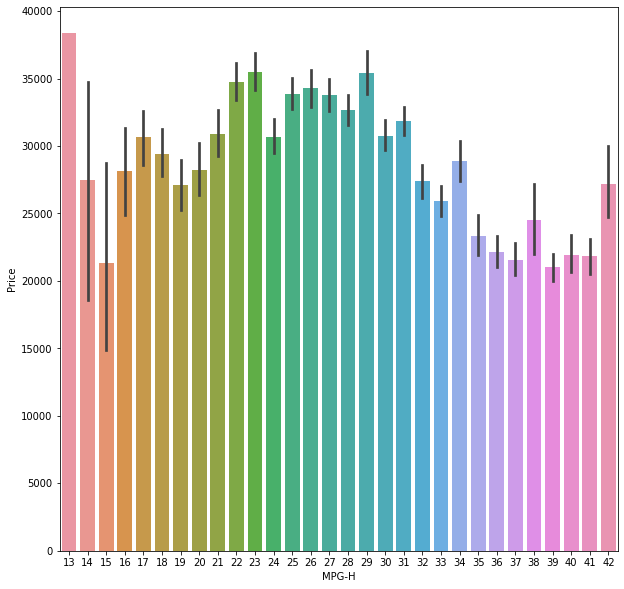

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(car_data['MPG-H'],car_data['Price'])

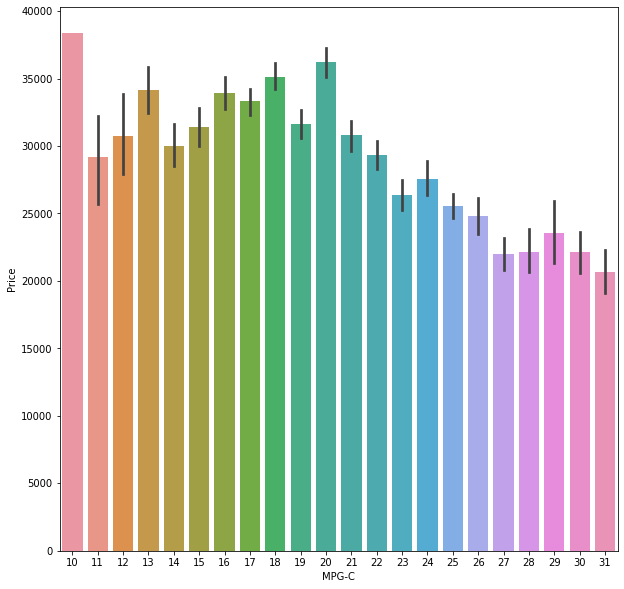

In [109]:
plt.figure(figsize=(10,10))
sns.barplot(car_data['MPG-C'],car_data['Price'])

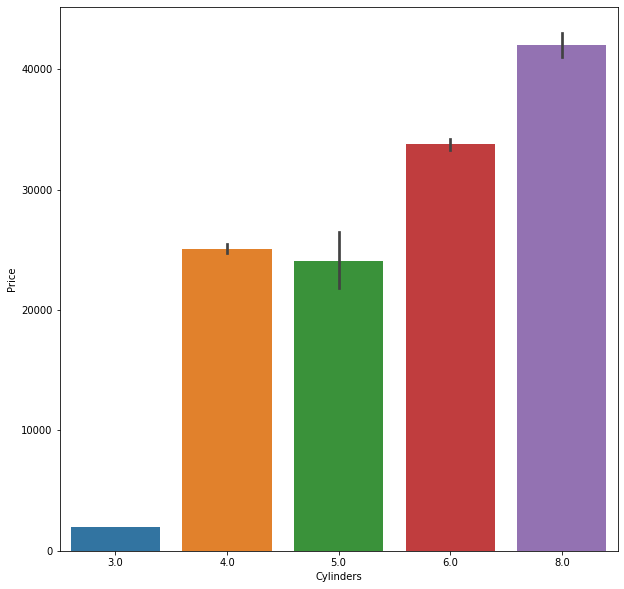

In [110]:
plt.figure(figsize=(10,10))
sns.barplot(car_data['Cylinders'],car_data['Price'])

**From the above plots we can conclude that all the variables such as Year,Cylinders,MPG-H,MPG-C and Hp have an effect on the required output variable Price.**

Where the variables such as Year,Cylinders, HP have an direct relation with the Price where as the variables such as MPG-H,MPG-C has inverse correlation with the Price

## 9.Developing a best fit Machine Learning model

**For this data choosing random forest gives a best fit**

In [111]:
#choosing the values for building the model
X=car_data[['Popularity','HP','Cylinders','MPG-C','MPG-H','Year']].values
y=car_data['Price'].values

In [112]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)
y=s.fit_transform(y.reshape(-1,1))

In [113]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [114]:
#implementing the random forest model to the traing and testing set
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=50,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


**plotting a scatter plot and distplot for better observation of the model**

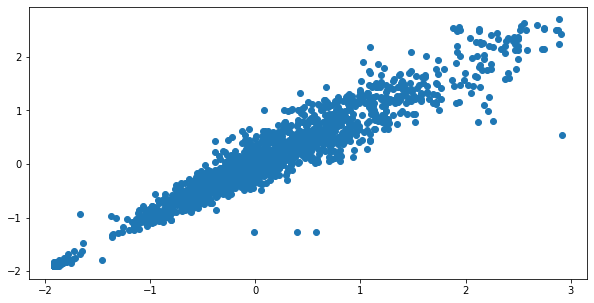

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

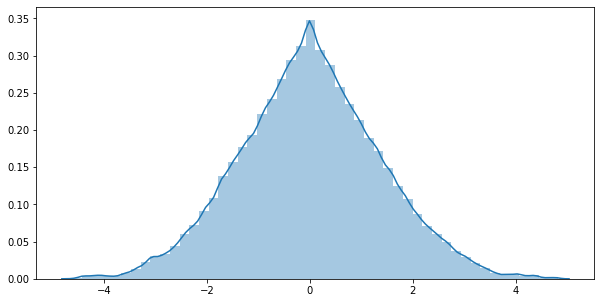

In [116]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred,bins=50)

**checking various parameters sucha as r2_score,RMSE,MAE**

In [117]:
from sklearn import metrics
print("Root Mean square error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute error=",metrics.mean_absolute_error(y_test,y_pred))
print("r2 score=",metrics.r2_score(y_test,y_pred))

Root Mean square error= 0.2685592395497229
Mean absolute error= 0.18721166019164556
r2 score= 0.9252126311526203


**Here the model got the accuracy of 92 percent which means that the model is good**

## 10.Observing various models of machine learning

### Linear Regression

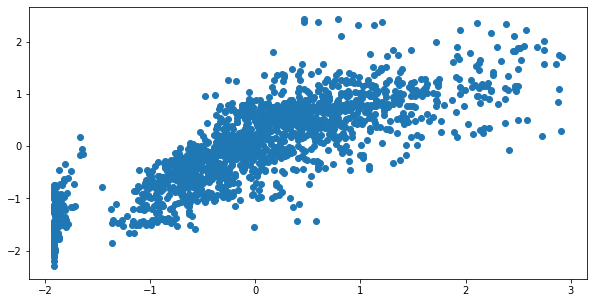

In [118]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

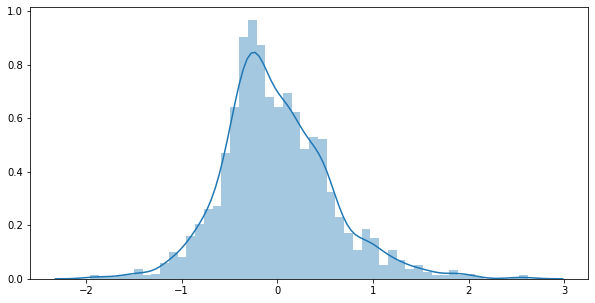

In [119]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred,bins=50)

In [120]:
print("Root Mean square error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute error=",metrics.mean_absolute_error(y_test,y_pred))
print("r2 score=",metrics.r2_score(y_test,y_pred))

Root Mean square error= 0.5689968076068861
Mean absolute error= 0.43590032287632785
r2 score= 0.6642873418413511


**From the above observations we can say that the model is not fit for implementation as the r2score is so less**

### Decision Tree Regressor

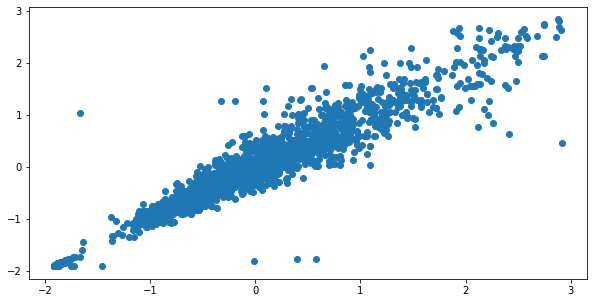

In [121]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

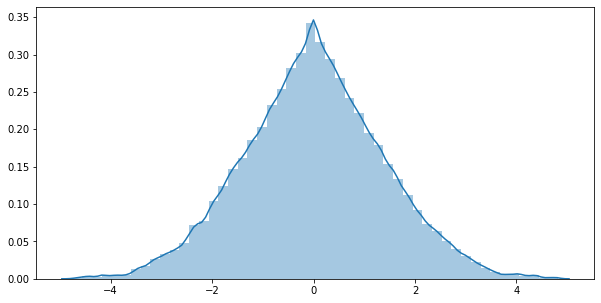

In [122]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred,bins=50)

In [123]:
print("Root Mean square error=",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute error=",metrics.mean_absolute_error(y_test,y_pred))
print("r2 score=",metrics.r2_score(y_test,y_pred))

Root Mean square error= 0.30489608072670776
Mean absolute error= 0.20041060889461124
r2 score= 0.9036056141241025


**From the above plottings and observations decision tree regressor has a r2 score of 0 percent which is less when compared to random forest.Hence it can not be the best model for the car data**